<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
  <ul class="toc-item">
    <li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></span></li>
    <li><span><a href="#Basic-description" data-toc-modified-id="Basic-description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Basic description</a></span></li>
    <li>
      <span><a href="#Univariate-plots" data-toc-modified-id="Univariate-plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Univariate plots</a></span>
      <ul class="toc-item">
        <li><span><a href="#Date-distribution" data-toc-modified-id="Date-distribution-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Date distribution</a></span></li>
        <li><span><a href="#Item-frequencies" data-toc-modified-id="Item-frequencies-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Item frequencies</a></span></li>
        <li><span><a href="#Item-price-distribution" data-toc-modified-id="Item-price-distribution-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Item price distribution</a></span></li>
        <li><span><a href="#Number-of-sales-and-simple-predictions" data-toc-modified-id="Number-of-sales-and-simple-predictions-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Number of sales and simple predictions</a></span></li>
        <li><span><a href="#Shop-frequencies" data-toc-modified-id="Shop-frequencies-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Shop frequencies</a></span></li>
        <li><span><a href="#Category-frequencies" data-toc-modified-id="Category-frequencies-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Category frequencies</a></span></li>
      </ul>
    </li>
    <li>
      <span><a href="#Time-Series-Plots" data-toc-modified-id="Time-Series-Plots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Time Series Plots</a></span>
      <ul class="toc-item">
        <li><span><a href="#Unique-items-vs-Time" data-toc-modified-id="Unique-items-vs-Time-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Unique items vs Time</a></span></li>
        <li><span><a href="#City/shop-over-time" data-toc-modified-id="City/shop-over-time-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>City/shop over time</a></span></li>
        <li><span><a href="#Category-over-time" data-toc-modified-id="Category-over-time-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Category over time</a></span></li>
      </ul>
    </li>
    <li>
      <span><a href="#Bivariate-plots" data-toc-modified-id="Bivariate-plots-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Bivariate plots</a></span>
      <ul class="toc-item">
        <li><span><a href="#Shop-vs-Category" data-toc-modified-id="Shop-vs-Category-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Shop vs Category</a></span></li>
        <li><span><a href="#Price-vs-Category" data-toc-modified-id="Price-vs-Category-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Price vs Category</a></span></li>
        <li><span><a href="#Price-vs-Shop" data-toc-modified-id="Price-vs-Shop-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Price vs Shop</a></span></li>
        <li><span><a href="#Number-of-sales-vs-Shop" data-toc-modified-id="Number-of-sales-vs-Shop-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Number of sales vs Shop</a></span></li>
        <li><span><a href="#Number-of-sales-(monthly-sum)-vs-Category" data-toc-modified-id="Number-of-sales-(monthly-sum)-vs-Category-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Number of sales (monthly sum) vs Category</a></span></li>
         <li><span><a href="#Distribution-of-sales-for-shop-item-pairs" data-toc-modified-id="Distribution-of-sales-for-shop-item-pairs-5.6"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Distribution of sales for shop-item pairs</a></span></li>
      </ul>
    </li>
    <li>
      <span><a href="#Test-data-exploration" data-toc-modified-id="Test-data-exploration-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Test data exploration</a></span>
      <ul class="toc-item">
        <li><span><a href="#Intuition-about-the-validation-scheme" data-toc-modified-id="Intuition-about-the-validation-scheme-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Intuition about the validation scheme</a></span></li>
      <li><span><a href="#New-items-categories" data-toc-modified-id="New-items-categories-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>New items categories</a></span></li>
      <li><span><a href="#Train-only-categories-and-shops" data-toc-modified-id="Train-only-categories-and-shops-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Train-only categories and shops</a></span></li>
      </ul>
     </li>
  </ul>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## Data preparation

First, I'm going to extract some more general categories from the `shop_name` and the `item_category_name` columns. Then join these support tables to the train and test dataframes.

In [2]:
TRAIN_PATH = '/kaggle/input/competitive-data-science-predict-future-sales/' 
items = pd.read_csv(TRAIN_PATH+'items.csv')
categories = pd.read_csv(TRAIN_PATH+'item_categories.csv')
shops = pd.read_csv(TRAIN_PATH+'shops.csv')
sales = pd.read_csv(TRAIN_PATH+'sales_train.csv')
test_df = pd.read_csv(TRAIN_PATH+'/test.csv')

In [3]:
sales

date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
...             ...             ...      ...      ...         ...   
2935844  10.10.2015              33       25     7409      299.00   
2935845  09.10.2015              33       25     7460      299.00   
2935846  14.10.2015              33       25     7459      349.00   
2935847  22.10.2015              33       25     7440      299.00   
2935848  03.10.2015              33       25     7460      299.00   

         item_cnt_day  
0                 1.0  
1                 1.0  
2                -1.0  
3                 1.0  
4                 1.0  
...               ...  
2935844           1.0  
2935845           1.0  
2935846           1.0  
2935847           1.0  
2935848           1.0  

[2935849 rows x 6 columns]

In [4]:
shops

shop_name  shop_id
0                     !Якутск Орджоникидзе, 56 фран        0
1                     !Якутск ТЦ "Центральный" фран        1
2                                  Адыгея ТЦ "Мега"        2
3                    Балашиха ТРК "Октябрь-Киномир"        3
4                          Волжский ТЦ "Волга Молл"        4
5                            Вологда ТРЦ "Мармелад"        5
6                        Воронеж (Плехановская, 13)        6
7                            Воронеж ТРЦ "Максимир"        7
8                      Воронеж ТРЦ Сити-Парк "Град"        8
9                                 Выездная Торговля        9
10                       Жуковский ул. Чкалова 39м?       10
11                       Жуковский ул. Чкалова 39м²       11
12                              Интернет-магазин ЧС       12
13                              Казань ТЦ "Бехетле"       13
14                          Казань ТЦ "ПаркХаус" II       14
15                             Калуга ТРЦ "XXI век"       15
16                                 Коломна ТЦ "Рио"       16
17                    Красноярск ТЦ "Взлетка Плаза"       17
18                             Красноярск ТЦ "Июнь"       18
19                            Курск ТЦ "Пушкинский"       19
20                              Москва "Распродажа"       20
21                           Москва МТРЦ "Афи Молл"       21
22                               Москва Магазин С21       22
23                 Москва ТК "Буденовский" (пав.А2)       23
24                 Москва ТК "Буденовский" (пав.К7)       24
25                              Москва ТРК "Атриум"       25
26                      Москва ТЦ "Ареал" (Беляево)       26
27                   Москва ТЦ "МЕГА Белая Дача II"       27
28                  Москва ТЦ "МЕГА Теплый Стан" II       28
29               Москва ТЦ "Новый век" (Новокосино)       29
30                           Москва ТЦ "Перловский"       30
31                          Москва ТЦ "Семеновский"       31
32                       Москва ТЦ "Серебряный Дом"       32
33                                Мытищи ТРК "XL-3"       33
34                             Н.Новгород ТРЦ "РИО"       34
35                      Н.Новгород ТРЦ "Фантастика"       35
36            Новосибирск ТРЦ "Галерея Новосибирск"       36
37                            Новосибирск ТЦ "Мега"       37
38                                   Омск ТЦ "Мега"       38
39            РостовНаДону ТРК "Мегацентр Горизонт"       39
40  РостовНаДону ТРК "Мегацентр Горизонт" Островной       40
41                           РостовНаДону ТЦ "Мега"       41
42                           СПб ТК "Невский Центр"       42
43                                  СПб ТК "Сенная"       43
44                              Самара ТЦ "Мелодия"       44
45                             Самара ТЦ "ПаркХаус"       45
46                            Сергиев Посад ТЦ "7Я"       46
47                           Сургут ТРЦ "Сити Молл"       47
48                     Томск ТРЦ "Изумрудный Город"       48
49                            Тюмень ТРЦ "Кристалл"       49
50                               Тюмень ТЦ "Гудвин"       50
51                        Тюмень ТЦ "Зеленый Берег"       51
52                             Уфа ТК "Центральный"       52
53                                 Уфа ТЦ "Семья" 2       53
54                                  Химки ТЦ "Мега"       54
55                         Цифровой склад 1С-Онлайн       55
56                             Чехов ТРЦ "Карнавал"       56
57                          Якутск Орджоникидзе, 56       57
58                          Якутск ТЦ "Центральный"       58
59                           Ярославль ТЦ "Альтаир"       59

In [5]:
categories

item_category_name  item_category_id
0     PC - Гарнитуры/Наушники                 0
1            Аксессуары - PS2                 1
2            Аксессуары - PS3                 2
3            Аксессуары - PS4                 3
4            Аксессуары - PSP                 4
..                        ...               ...
79                  Служебные                79
80         Служебные - Билеты                80
81    Чистые носители (шпиль)                81
82  Чистые носители (штучные)                82
83           Элементы питания                83

[84 rows x 2 columns]

In [6]:
yakutsk = shops['shop_name'].str.contains('!Якутск')
shops.loc[yakutsk, 'shop_name'] = shops.loc[yakutsk, 'shop_name'].str.slice(start=1)
shops['city'] = shops['shop_name'].str.split(n=1, expand=True)[0]
other = shops['city'].isin(['Цифровой', 'Интернет-магазин', 'Выездная'])
shops.loc[other, 'city'] = 'Other'


categories['primary_category'] = categories['item_category_name'].str.split(' -', n=1, expand=True)[0]
categories.loc[categories['primary_category'].str.startswith('Чистые носители'), 'primary_category'] = 'Чистые носители'
categories.loc[categories['primary_category'].str.startswith('Карты оплаты'), 'primary_category'] = 'Карты оплаты'


sales['date'] = pd.to_datetime(sales['date'], format='%d.%m.%Y')
sales['revenue'] = sales['item_price'] * sales['item_cnt_day']
sales['month'] = sales.date.dt.to_period('M')  # the same as date_block_num but in a datetime for convenience
sales.loc[sales.shop_id==11, 'shop_id'] = 10

train_df = (sales.merge(shops, on='shop_id')
                 .merge(items, on='item_id')
                 .merge(categories, on='item_category_id')
                 )

test_df = (test_df.merge(shops, on='shop_id')
                  .merge(items, on='item_id')
                  .merge(categories, on='item_category_id')
                  )

## Basic description

In [7]:
train_df.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0 2013-01-02               0       59    22154       999.0           1.0   
1 2013-01-02               0       25    22154       999.0           1.0   
2 2013-01-03               0       25    22154       999.0           1.0   
3 2013-01-20               0       25    22154       999.0           1.0   
4 2013-01-23               0       25    22154       999.0           1.0   

   revenue    month               shop_name       city          item_name  \
0    999.0  2013-01  Ярославль ТЦ "Альтаир"  Ярославль  ЯВЛЕНИЕ 2012 (BD)   
1    999.0  2013-01     Москва ТРК "Атриум"     Москва  ЯВЛЕНИЕ 2012 (BD)   
2    999.0  2013-01     Москва ТРК "Атриум"     Москва  ЯВЛЕНИЕ 2012 (BD)   
3    999.0  2013-01     Москва ТРК "Атриум"     Москва  ЯВЛЕНИЕ 2012 (BD)   
4    999.0  2013-01     Москва ТРК "Атриум"     Москва  ЯВЛЕНИЕ 2012 (BD)   

   item_category_id item_category_name primary_category  
0                37     Кино - Blu-Ray             Кино  
1                37     Кино - Blu-Ray             Кино  
2                37     Кино - Blu-Ray             Кино  
3                37     Кино - Blu-Ray             Кино  
4                37     Кино - Blu-Ray             Кино

In [8]:
train_df.shape

(2935849, 14)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int64         
 2   shop_id             int64         
 3   item_id             int64         
 4   item_price          float64       
 5   item_cnt_day        float64       
 6   revenue             float64       
 7   month               period[M]     
 8   shop_name           object        
 9   city                object        
 10  item_name           object        
 11  item_category_id    int64         
 12  item_category_name  object        
 13  primary_category    object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(5), period[M](1)
memory usage: 336.0+ MB


In [10]:
train_df.loc[:, ~train_df.columns.str.contains('_id')].describe()

date_block_num    item_price  item_cnt_day       revenue
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06
mean     1.456991e+01  8.908532e+02  1.242641e+00  1.157732e+03
std      9.422988e+00  1.729800e+03  2.618834e+00  5.683604e+03
min      0.000000e+00 -1.000000e+00 -2.200000e+01 -6.897000e+04
25%      7.000000e+00  2.490000e+02  1.000000e+00  2.490000e+02
50%      1.400000e+01  3.990000e+02  1.000000e+00  4.490000e+02
75%      2.300000e+01  9.990000e+02  1.000000e+00  1.078200e+03
max      3.300000e+01  3.079800e+05  2.169000e+03  1.829990e+06

In [11]:
train_df.nunique()

date                   1034
date_block_num           34
shop_id                  59
item_id               21807
item_price            19993
item_cnt_day            198
revenue               24771
month                    34
shop_name                59
city                     29
item_name             21807
item_category_id         84
item_category_name       84
primary_category         18
dtype: int64

In [12]:
train_df.isna().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
revenue               0
month                 0
shop_name             0
city                  0
item_name             0
item_category_id      0
item_category_name    0
primary_category      0
dtype: int64

## Univariate plots

In [13]:
def hist_box_plot(data, logy=True):
    fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]}, sharex=True)
    sns.boxplot(x=data, ax=ax[0])
    data.plot(kind='hist', logy=logy, bins=100, ax=ax[1])
    return ax

### Date distribution

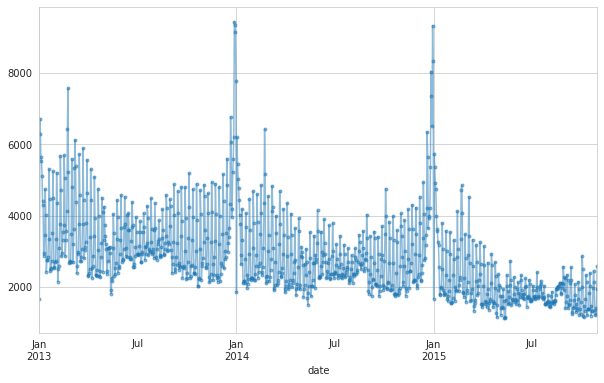

In [14]:
train_df.groupby('date').size().plot(marker='.', alpha=0.5);

There is some seasonality patterns

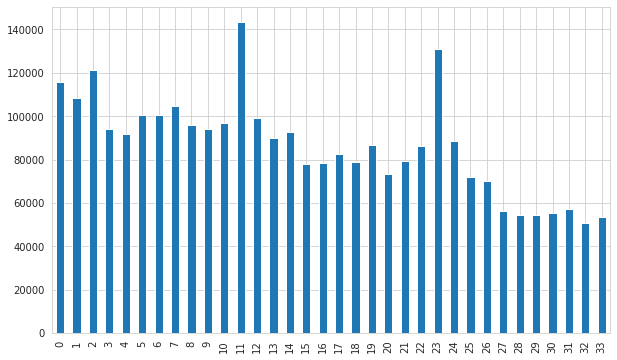

In [15]:
train_df['date_block_num'].value_counts().sort_index().plot(kind='bar');

### Item frequencies

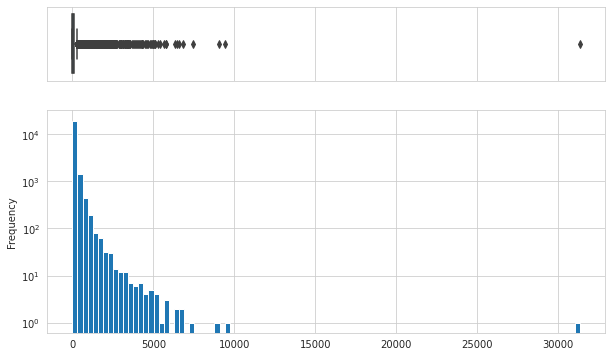

In [16]:
item_counts = train_df.item_id.value_counts()
hist_box_plot(item_counts);

In [17]:
item_counts.describe()

count    21807.000000
mean       134.628743
std        406.938186
min          1.000000
25%          6.000000
50%         32.000000
75%        119.000000
max      31340.000000
Name: item_id, dtype: float64

In [18]:
train_df.item_name.value_counts().head(10)

Фирменный пакет майка 1С Интерес белый (34*42) 45 мкм                                    31340
Playstation Store пополнение бумажника: Карта оплаты 1000 руб.                            9408
Прием денежных средств для 1С-Онлайн                                                      9067
Diablo III [PC, Jewel, русская версия]                                                    7479
Kaspersky Internet Security Multi-Device Russian Edition. 2-Device 1 year Renewal Box     6853
World of Warcraft. Карта оплаты игрового времени (online) (рус.в.) (60 дней) (Jewel)      6602
Grand Theft Auto V [PS3, русские субтитры]                                                6475
Call of Duty: Black Ops II [PС, Jewel, русская версия]                                    6320
Minecraft [Xbox 360, английская версия]                                                   5811
Grand Theft Auto V [Xbox 360, русские субтитры]                                           5805
Name: item_name, dtype: int64

The most frequent item is a plastic bag. Looks realistic

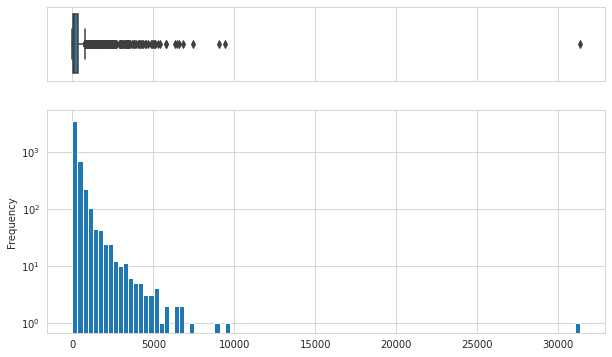

In [19]:
hist_box_plot(item_counts[item_counts.index.isin(test_df.item_id)]);

### Item price distribution

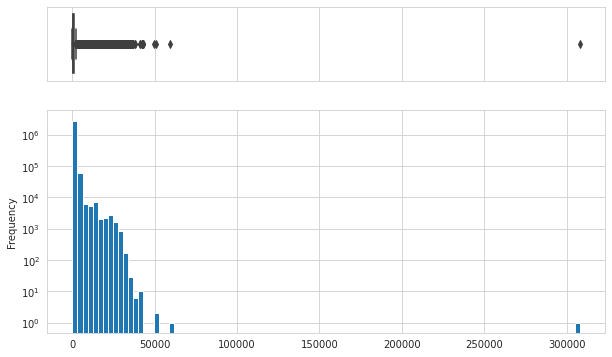

In [20]:
hist_box_plot(train_df['item_price']);

In [21]:
train_df[train_df['item_price'] >= 40000] 

date  date_block_num  shop_id  item_id  item_price  \
2105018 2013-10-24               9       12     7238     42000.0   
2105022 2013-12-13              11       12     6066    307980.0   
2105039 2014-11-20              22       12    14173     40900.0   
2105041 2015-01-29              24       12     7241     49782.0   
2269597 2014-03-20              14       25    13199     50999.0   
2862907 2015-10-20              33       22    13403     42990.0   
2862908 2015-10-22              33       18    13403     41990.0   
2862909 2015-10-22              33       28    13403     40991.0   
2862910 2015-10-20              33        3    13403     42990.0   
2862911 2015-10-20              33       12    13403     41990.0   
2862912 2015-10-29              33       12    13403     42990.0   
2862914 2015-10-23              33       42    13403     42990.0   
2862917 2015-10-20              33       38    13403     41990.0   
2899483 2013-09-17               8       12    11365     59200.0   

         item_cnt_day   revenue    month                        shop_name  \
2105018           1.0   42000.0  2013-10              Интернет-магазин ЧС   
2105022           1.0  307980.0  2013-12              Интернет-магазин ЧС   
2105039           1.0   40900.0  2014-11              Интернет-магазин ЧС   
2105041           1.0   49782.0  2015-01              Интернет-магазин ЧС   
2269597           1.0   50999.0  2014-03              Москва ТРК "Атриум"   
2862907           1.0   42990.0  2015-10               Москва Магазин С21   
2862908           1.0   41990.0  2015-10             Красноярск ТЦ "Июнь"   
2862909           1.0   40991.0  2015-10  Москва ТЦ "МЕГА Теплый Стан" II   
2862910           1.0   42990.0  2015-10   Балашиха ТРК "Октябрь-Киномир"   
2862911           1.0   41990.0  2015-10              Интернет-магазин ЧС   
2862912           1.0   42990.0  2015-10              Интернет-магазин ЧС   
2862914           1.0   42990.0  2015-10           СПб ТК "Невский Центр"   
2862917           1.0   41990.0  2015-10                   Омск ТЦ "Мега"   
2899483           1.0   59200.0  2013-09              Интернет-магазин ЧС   

               city                                          item_name  \
2105018       Other        UserGate Proxy & Firewall 6.X до 100 сессий   
2105022       Other                               Radmin 3  - 522 лиц.   
2105039       Other   Лицензия 1С-Битрикс: Управление сайтом - Эксперт   
2105041       Other  UserGate Proxy & Firewall 6.X с модулем фильтр...   
2269597      Москва            Коллекционные шахматы (Властелин Колец)   
2862907      Москва  Комплект "Microsoft Xbox One 1TB  Limited Edit...   
2862908  Красноярск  Комплект "Microsoft Xbox One 1TB  Limited Edit...   
2862909      Москва  Комплект "Microsoft Xbox One 1TB  Limited Edit...   
2862910    Балашиха  Комплект "Microsoft Xbox One 1TB  Limited Edit...   
2862911       Other  Комплект "Microsoft Xbox One 1TB  Limited Edit...   
2862912       Other  Комплект "Microsoft Xbox One 1TB  Limited Edit...   
2862914         СПб  Комплект "Microsoft Xbox One 1TB  Limited Edit...   
2862917        Омск  Комплект "Microsoft Xbox One 1TB  Limited Edit...   
2899483       Other                                     Доставка (EMS)   

         item_category_id            item_category_name primary_category  
2105018                75  Программы - Для дома и офиса        Программы  
2105022                75  Программы - Для дома и офиса        Программы  
2105039                75  Программы - Для дома и офиса        Программы  
2105041                75  Программы - Для дома и офиса        Программы  
2269597                69            Подарки - Сувениры          Подарки  
2862907                16    Игровые консоли - XBOX ONE  Игровые консоли  
2862908                16    Игровые консоли - XBOX ONE  Игровые консоли  
2862909                16    Игровые консоли - XBOX ONE  Игровые консоли  
2862910                16    Игровые консоли - XBOX

id 2899483 is definetely an outlier (59.2k for delivery). Let's drop

In [22]:
train_df.drop(index=2899483, inplace=True)

Row id=2105022 looks strange. It is definitely an outlier by price, but we can see "522 licenses" in its name. Maybe it was a system glitch or something. Let's examine

In [23]:
train_df.loc[train_df['item_name'].str.contains('Radmin 3'), 'item_name'].value_counts()

Radmin 3  - 1 лиц.      33
Radmin 3  - 522 лиц.     1
Name: item_name, dtype: int64

In [24]:
items[items['item_name'].str.contains('Radmin 3')]

item_name  item_id  item_category_id
6065    Radmin 3  - 1 лиц.     6065                75
6066  Radmin 3  - 522 лиц.     6066                75

I prefer to drop this record, but it can be fixed too

In [25]:
# Fix
# outlier = train_df.iloc[2105022].copy()
# outlier.update(items.iloc[6065])
# outlier.update({'item_price': outlier.item_price/522, 'item_cnt_day': 522})
# train_df.iloc[2105022] = outlier
# train_df.iloc[2105022]

# OR drop
train_df.drop(index=2105022, inplace=True)

Finally

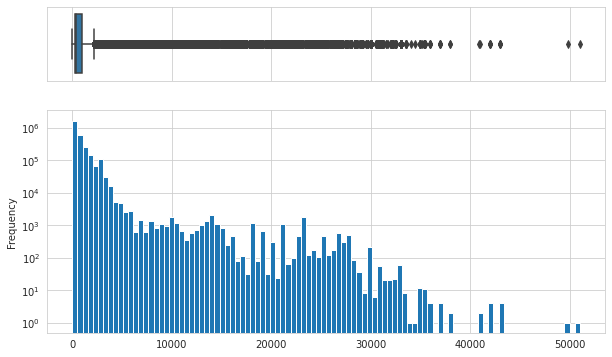

In [26]:
hist_box_plot(train_df['item_price']);

### Number of sales

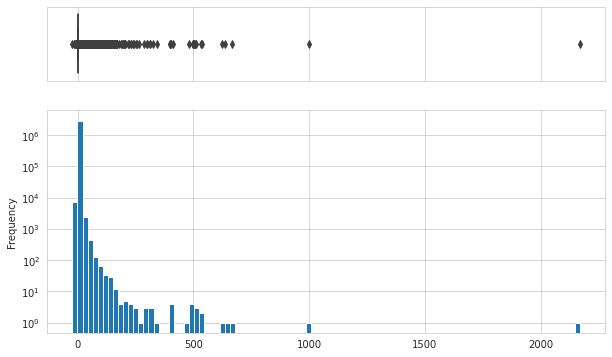

In [27]:
hist_box_plot(train_df['item_cnt_day']);

In [28]:
train_df[train_df['item_cnt_day'] >= 900] 

date  date_block_num  shop_id  item_id  item_price  \
2717316 2015-01-15              24       12    20949    4.000000   
2900512 2015-10-28              33       12    11373    0.908714   

         item_cnt_day  revenue    month            shop_name   city  \
2717316        1000.0   4000.0  2015-01  Интернет-магазин ЧС  Other   
2900512        2169.0   1971.0  2015-10  Интернет-магазин ЧС  Other   

                                                 item_name  item_category_id  \
2717316  Фирменный пакет майка 1С Интерес белый (34*42)...                71   
2900512               Доставка до пункта выдачи (Boxberry)                 9   

                               item_category_name primary_category  
2717316  Подарки - Сумки, Альбомы, Коврики д/мыши          Подарки  
2900512                           Доставка товара  Доставка товара

1000 plastic bags and 2169 deliveries, both in the internet-shop. Definitely outliers by the item_cnt_day but still look like possible situation. I prefer to drop anyway.

In [29]:
train_df.drop(index=train_df[train_df['item_cnt_day'] >= 900].index, inplace=True)

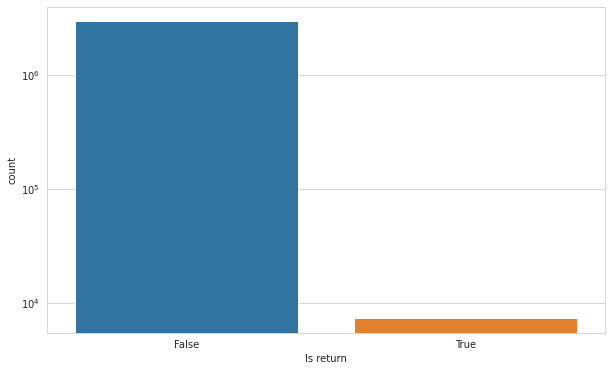

In [30]:
plt.yscale('log')
sns.countplot(x=(train_df['item_cnt_day'] < 0))
plt.xlabel('Is return');

The number of returns is relatively small, so I won't explore it in detail.

### Shop frequencies

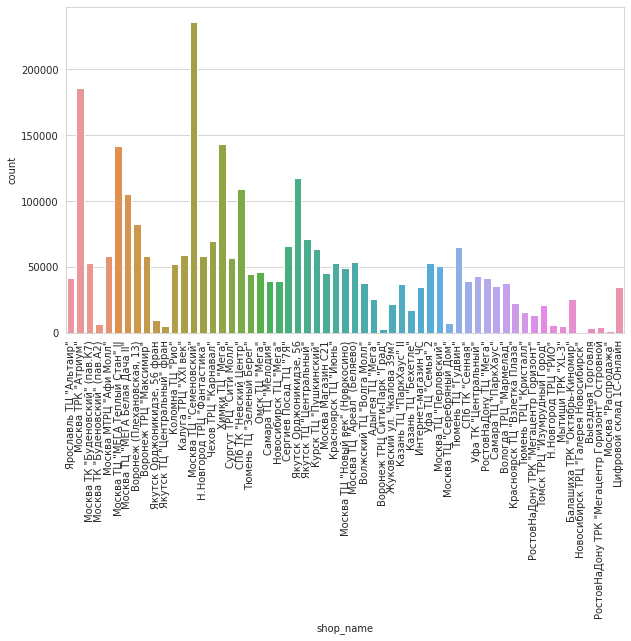

In [31]:
sns.countplot(x='shop_name', data=train_df)
plt.xticks(rotation=90);

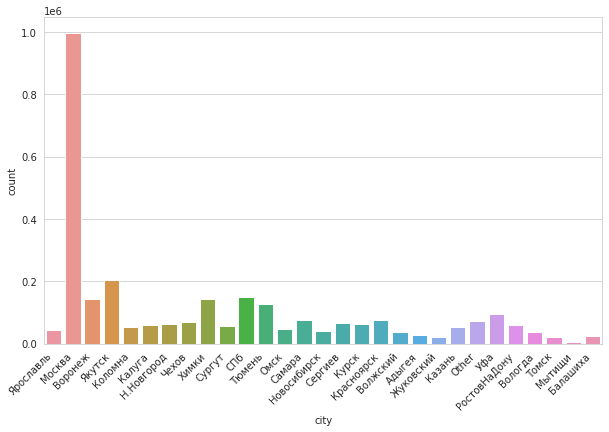

In [32]:
sns.countplot(x='city', data=train_df)
plt.xticks(rotation=45, ha='right');

### Category frequencies

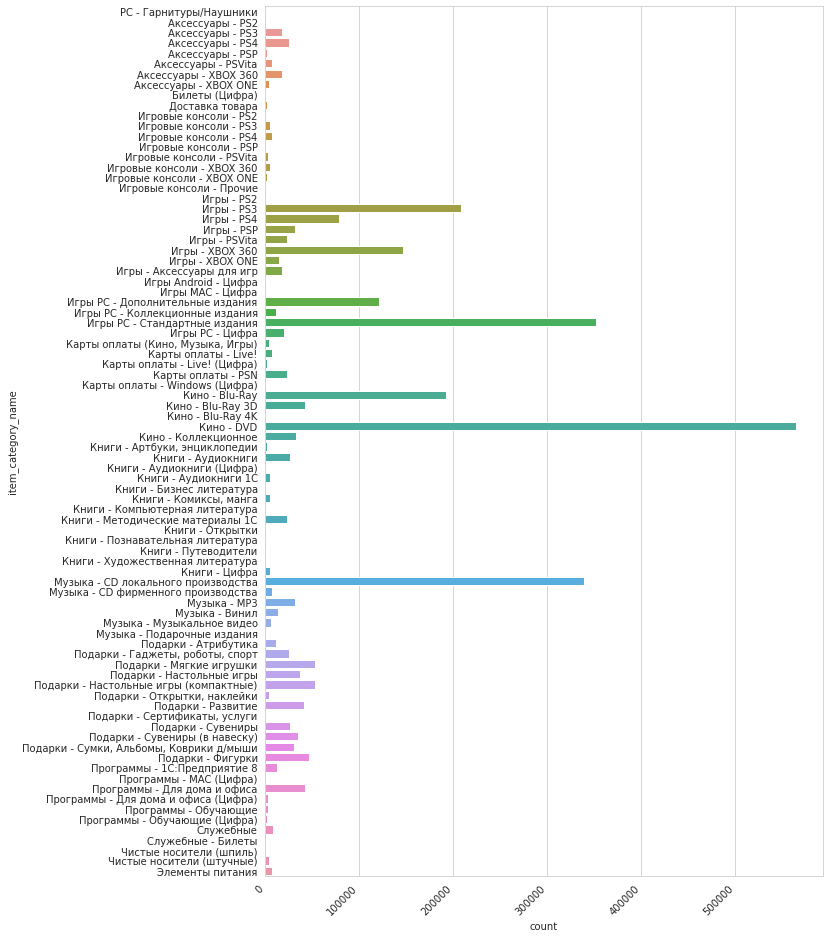

In [33]:
plt.subplots(figsize=(10, 16))
sns.countplot(y=train_df['item_category_name'], order=train_df['item_category_name'].drop_duplicates().sort_values())
plt.xticks(rotation=45, ha='right');

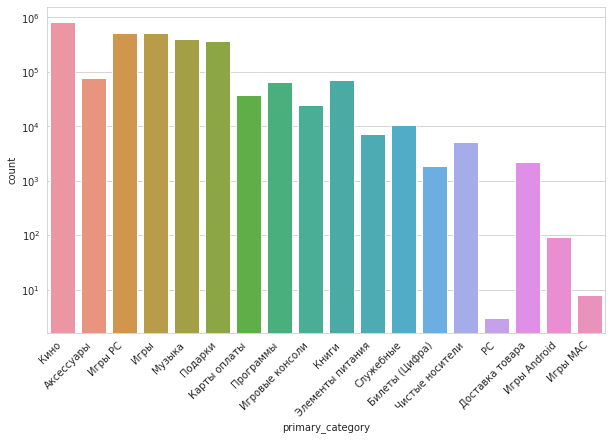

In [34]:
sns.countplot(x='primary_category', data=train_df)
plt.yscale('log')
plt.xticks(rotation=45, ha='right');

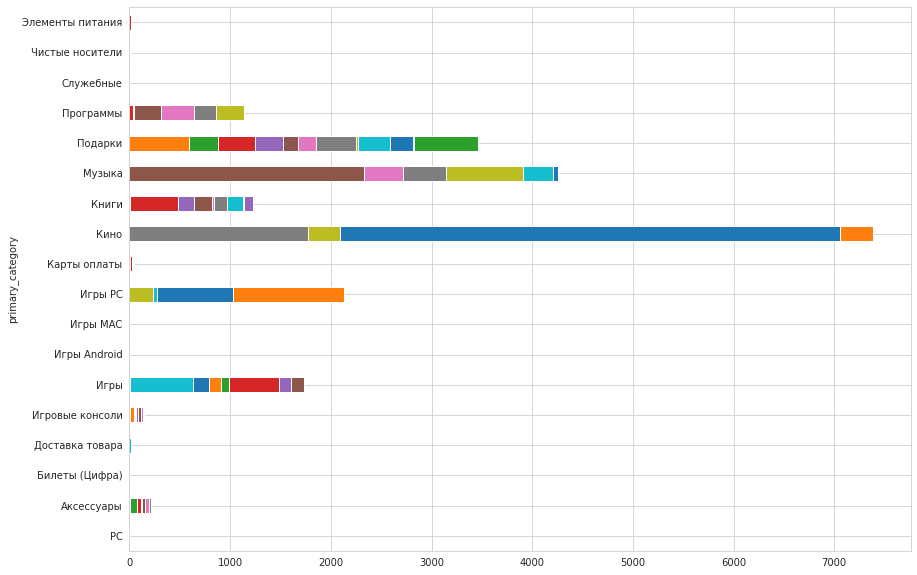

In [35]:
items_in_categories = train_df.groupby(['primary_category', 'item_category_name'])['item_name'].nunique(dropna=False)
items_in_categories.unstack().plot(kind='barh', stacked=True, legend=False, figsize=(14, 10));

In [36]:
items_in_categories.groupby('primary_category').agg(['sum', 'size', 'mean'])

sum  size         mean
primary_category                         
PC                   3     1     3.000000
Аксессуары         217     7    31.000000
Билеты (Цифра)       9     1     9.000000
Доставка товара     12     1    12.000000
Игровые консоли    144     8    18.000000
Игры              1732     8   216.500000
Игры Android         3     1     3.000000
Игры MAC             7     1     7.000000
Игры PC           2129     4   532.250000
Карты оплаты        41     5     8.200000
Кино              7390     5  1478.000000
Книги             1229    13    94.538462
Музыка            4259     6   709.833333
Подарки           3461    12   288.416667
Программы         1133     6   188.833333
Служебные            7     2     3.500000
Чистые носители     15     2     7.500000
Элементы питания    15     1    15.000000

## Time Series Plots

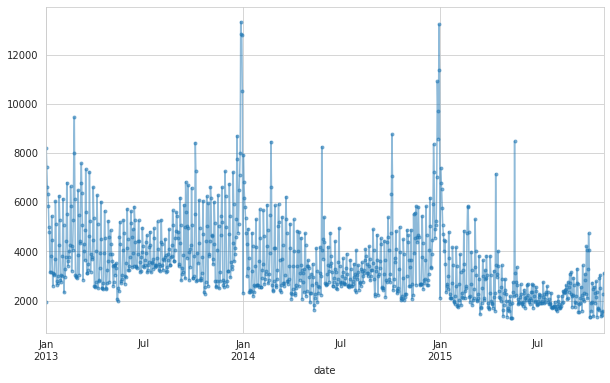

In [37]:
train_df.groupby('date')['item_cnt_day'].sum().plot(marker='.', alpha=0.5);

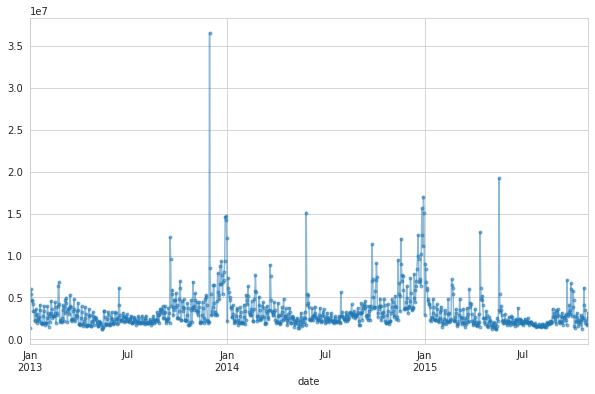

In [38]:
train_df.groupby('date')['revenue'].sum().plot(marker='.', alpha=0.5);

### Unique items vs Time

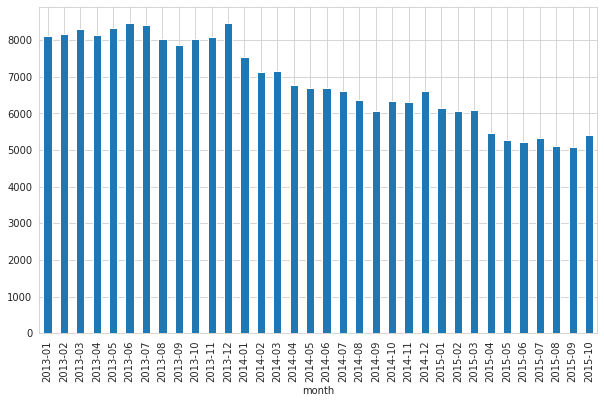

In [39]:
train_df.groupby('month')['item_id'].nunique().plot(kind='bar');

In [40]:
month_uniques = train_df.groupby('month')['item_id'].agg(set)
old_items = month_uniques.apply(list).cumsum().apply(set).shift()
num_new_items = (month_uniques.iloc[1:] - old_items.iloc[1:]).apply(len)
num_new_items['2015-11 (test)'] = len(set(np.unique(test_df['item_id'])) - set(np.unique(train_df['item_id'])))
num_new_items

month
2013-02           1237
2013-03            798
2013-04            628
2013-05            682
2013-06            531
2013-07            447
2013-08            470
2013-09            384
2013-10            654
2013-11            489
2013-12            535
2014-01            207
2014-02            339
2014-03            310
2014-04            319
2014-05            262
2014-06            253
2014-07            316
2014-08            250
2014-09            330
2014-10            558
2014-11            460
2014-12            472
2015-01            197
2015-02            225
2015-03            336
2015-04            262
2015-05            225
2015-06            250
2015-07            206
2015-08            282
2015-09            302
2015-10            475
2015-11 (test)     363
Name: item_id, dtype: int64

### City/shop over time
Dashed lines shows aggregated monthly value

In [41]:
def plot_category_vs_time(category_col, agg_col, agg_func='sum', plot_monthly=True, highlighted_cats=None):
    timeseries = train_df.groupby(['date', category_col])[agg_col].agg(agg_func).unstack()
    
    rows = len(timeseries.columns)
    axs = timeseries.plot(figsize=(14, rows*0.9), subplots=True, sharex=True, grid=False)
    
    axs[0].set_title(agg_col, fontsize=16)
    
    for ax in axs:
        ax.legend(loc='upper left')
        ax.grid(axis='x')
    
    if highlighted_cats:
        for ax in axs[timeseries.columns.isin(highlighted_cats)]:
            ax.set_facecolor('#E6E6E6')
    
    if plot_monthly:
        timeseries_monthly = train_df.groupby(['month', category_col])[agg_col].agg(agg_func).unstack()
        timeseries_monthly.plot(ax=axs, subplots=True, secondary_y=True, linestyle='--', legend=False, alpha=.6, yticks=[]);
    
    return axs

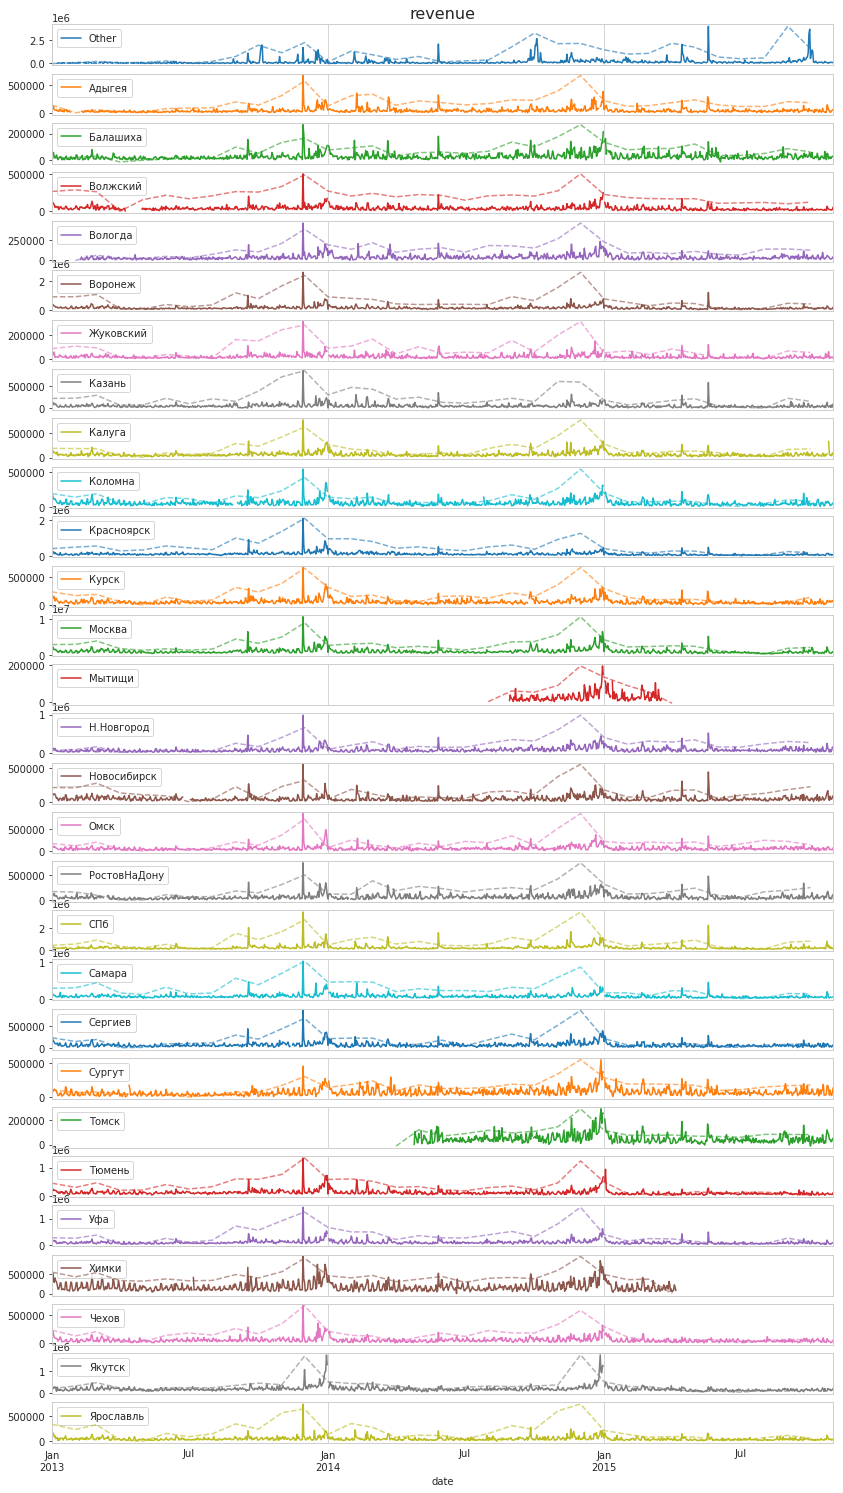

In [42]:
plot_category_vs_time('city', 'revenue');

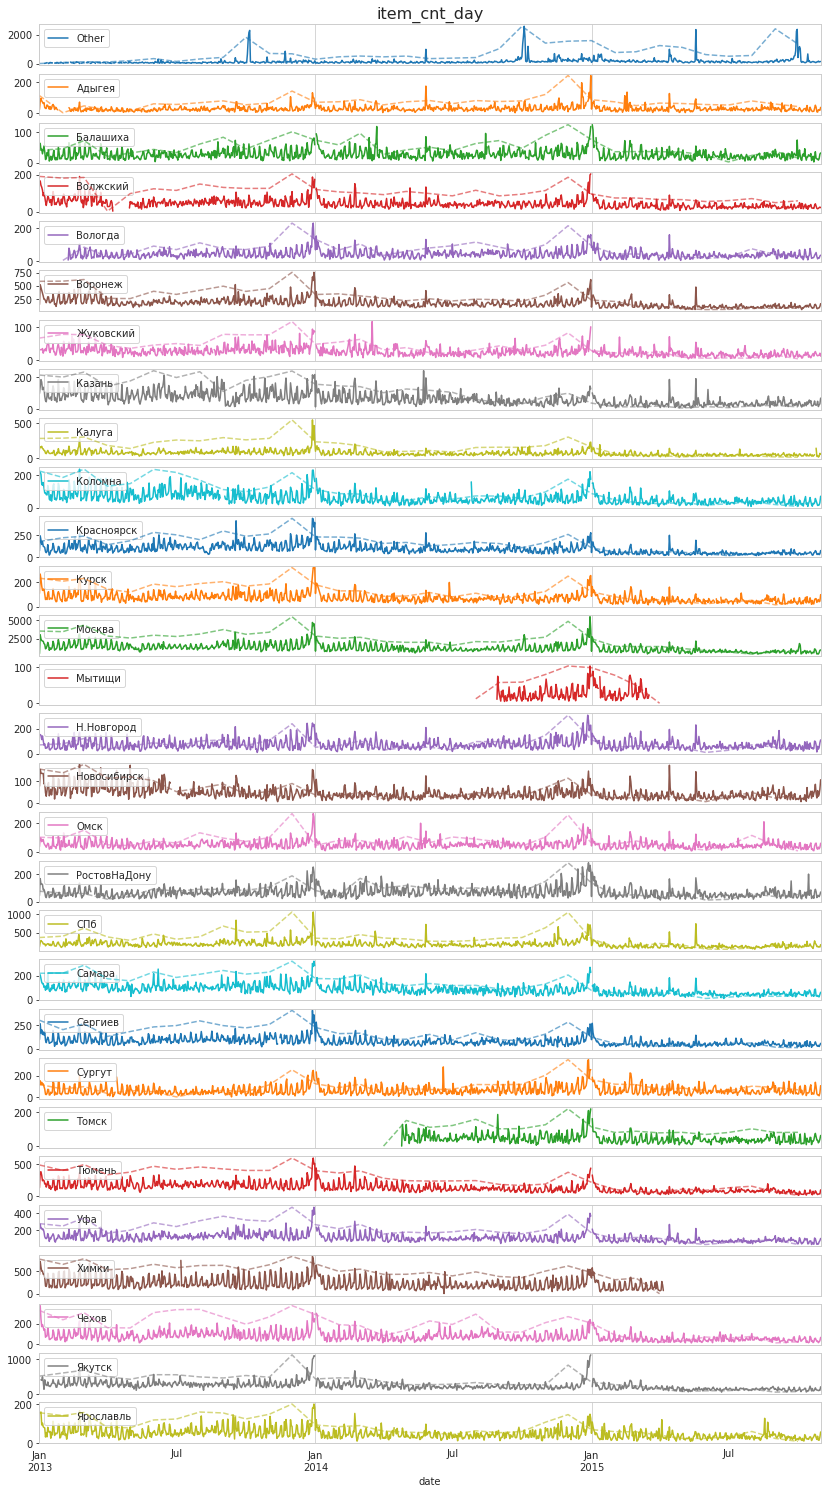

In [43]:
plot_category_vs_time('city', 'item_cnt_day');

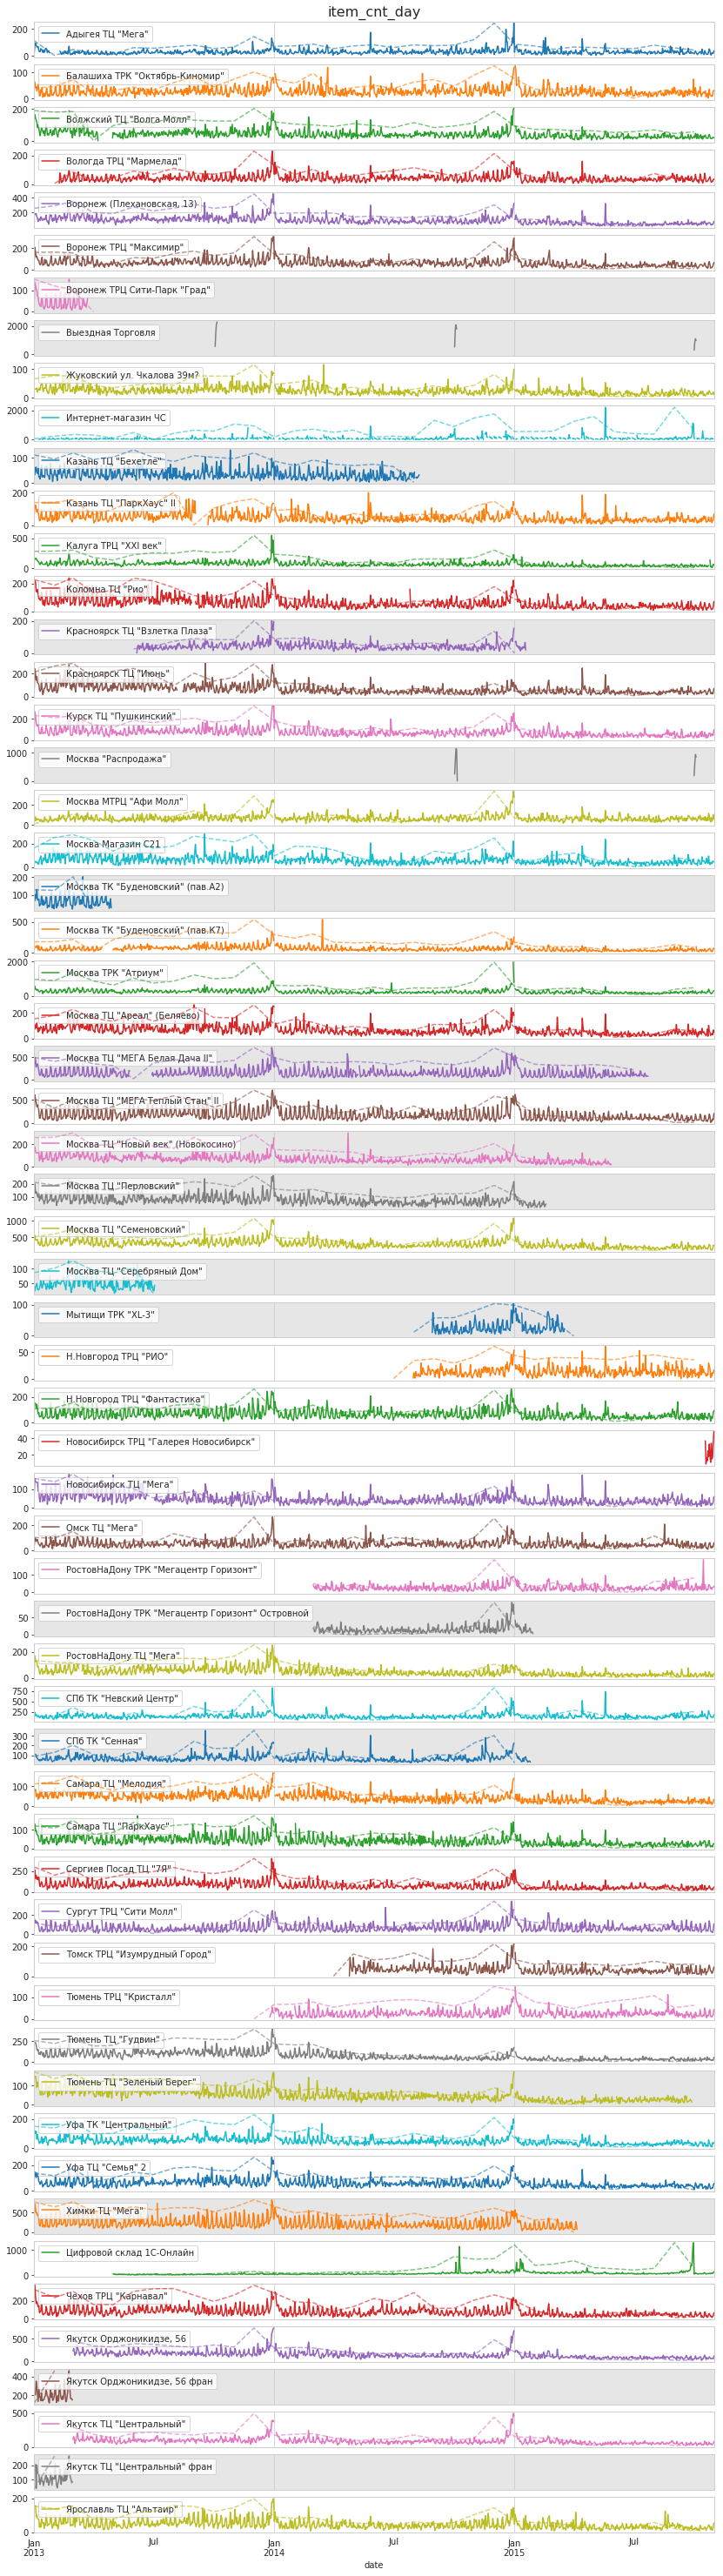

In [44]:
missing_shops = set(np.unique(train_df.shop_name)) - set(np.unique(test_df.shop_name))
plot_category_vs_time('shop_name', 'item_cnt_day', highlighted_cats=missing_shops);

Gray layout color marks shops that do not appear in the test set. All of them were all closed a while ago. 

### Category over time

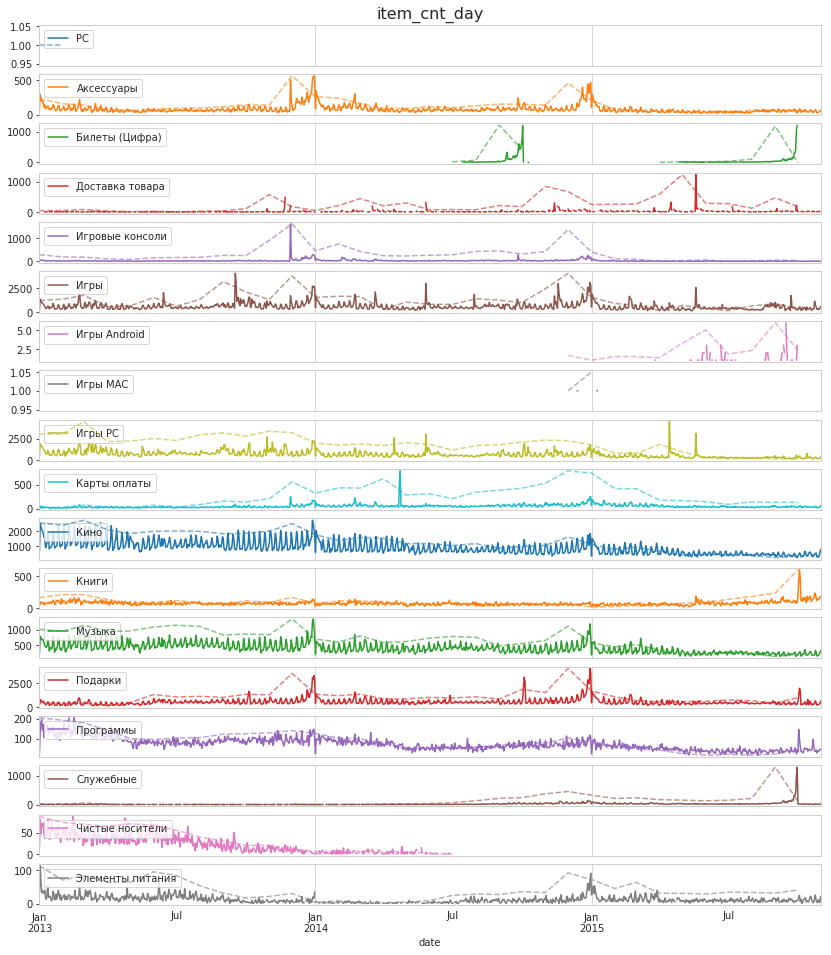

In [45]:
plot_category_vs_time('primary_category', 'item_cnt_day');

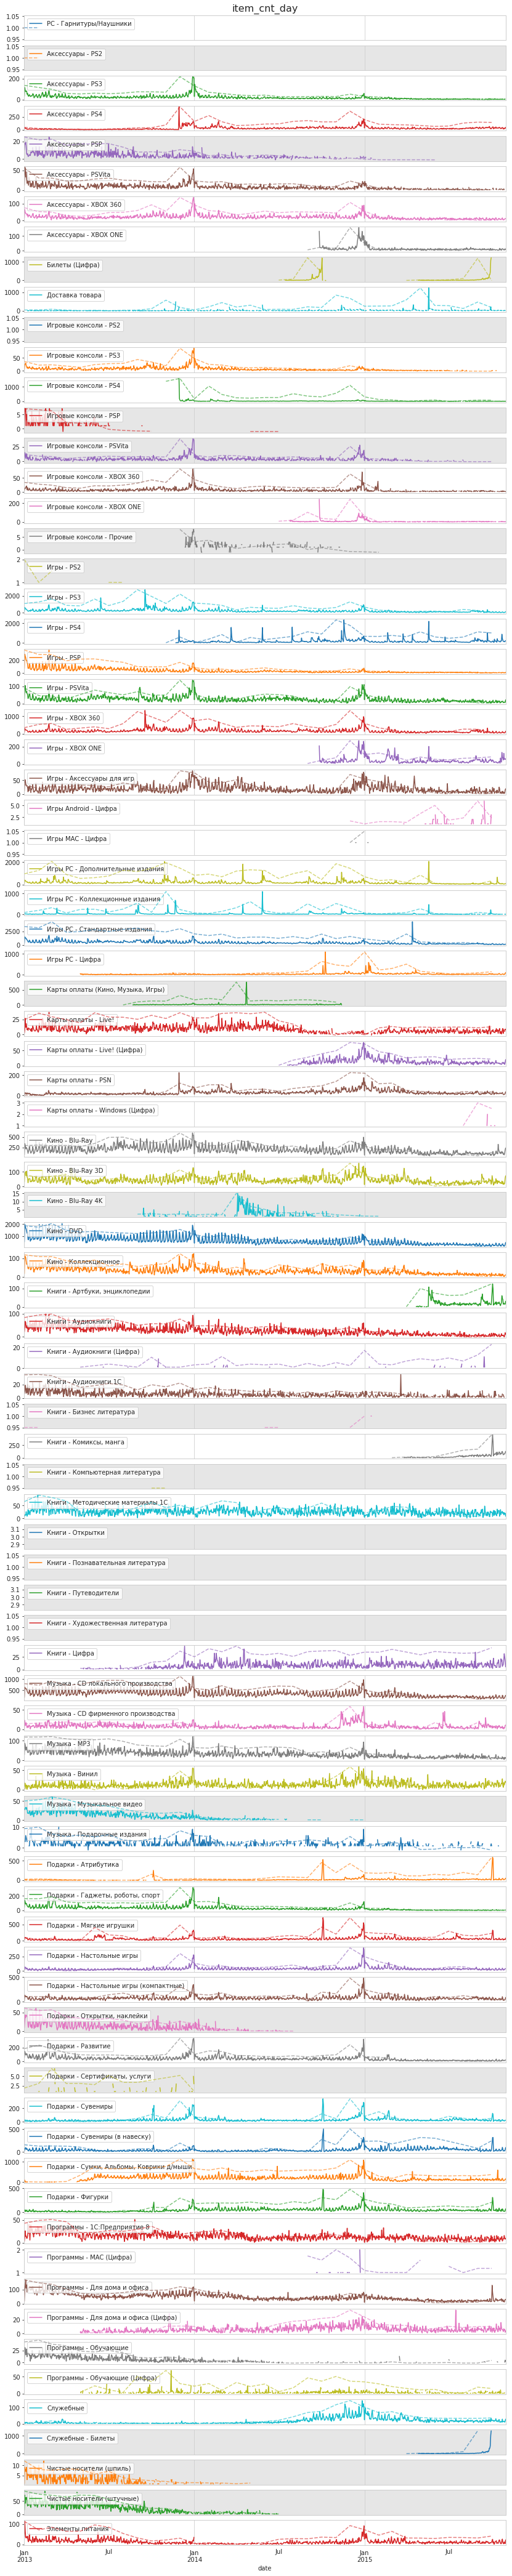

In [46]:
missing_cat = set(np.unique(train_df.item_category_name)) - set(np.unique(test_df.item_category_name))
plot_category_vs_time('item_category_name', 'item_cnt_day', highlighted_cats=missing_cat);

Gray layout color marks categories that do not appear in the test set. Many of them are simply outdated (old game consoles, blank CDs ("Чистые носители", tickets ("Билеты")), other just were unpopular. But there is some categories that have a small number of sales, but still presented in test set: "PC - Гарнитура/Наушники" (earphones), "Игры MAC - Цифра" (Videogames for MAC), and four more ambiguous: "Игры Android - Цифра" (Android games), "Карты оплаты - Windows (цифра)" (payment cards for windows),  "Книги - аудиокниги (цифра)" (digital audiobooks), "Программы - MAC (Цифра)" (software for MAC). Maybe it will be a good idea to set them as 0 manually.

## Bivariate plots

### Shop vs Category

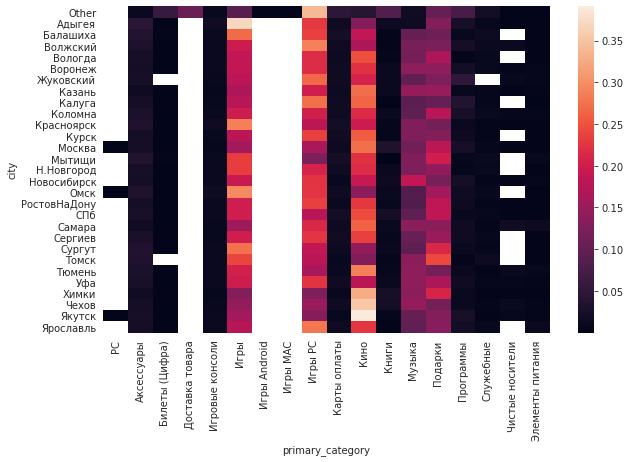

In [47]:
city_vs_category = (train_df.groupby(['city', 'primary_category'])['item_cnt_day']
                            .sum()
                            .unstack()
                            .apply(lambda x: x/x.sum(), axis=1)
                            )
sns.heatmap(city_vs_category, mask=city_vs_category.isna());

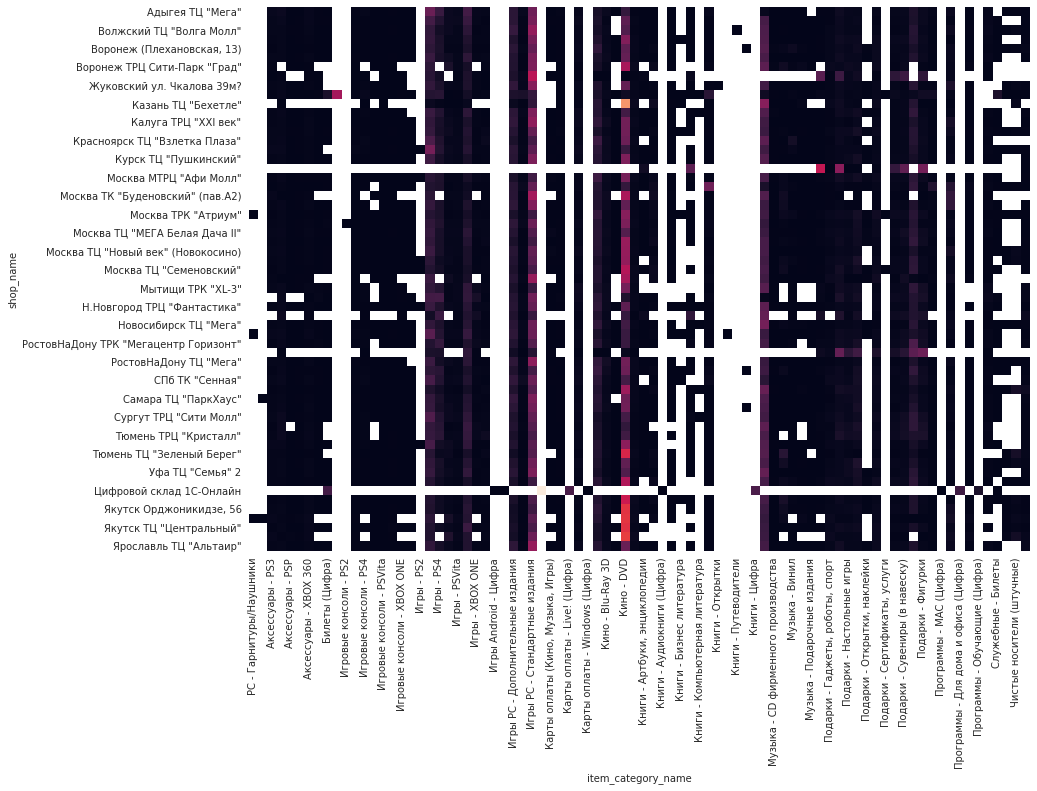

In [48]:
shop_vs_category = (train_df.groupby(['shop_name', 'item_category_name'])['item_cnt_day']
                            .sum()
                            .unstack()
                            .apply(lambda x: x/x.sum(), axis=1)
                            )
plt.subplots(figsize=(14, 10))
sns.heatmap(shop_vs_category, mask=shop_vs_category.isna(), square=False, cbar=False);

### Price vs Category

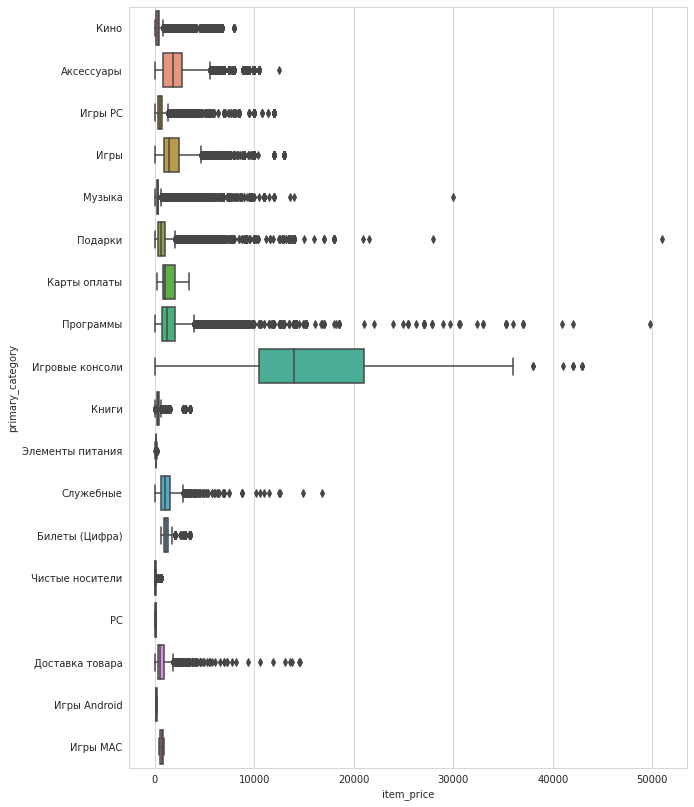

In [49]:
plt.subplots(figsize=(10, 14))
sns.boxplot(x='item_price', y='primary_category', data=train_df);

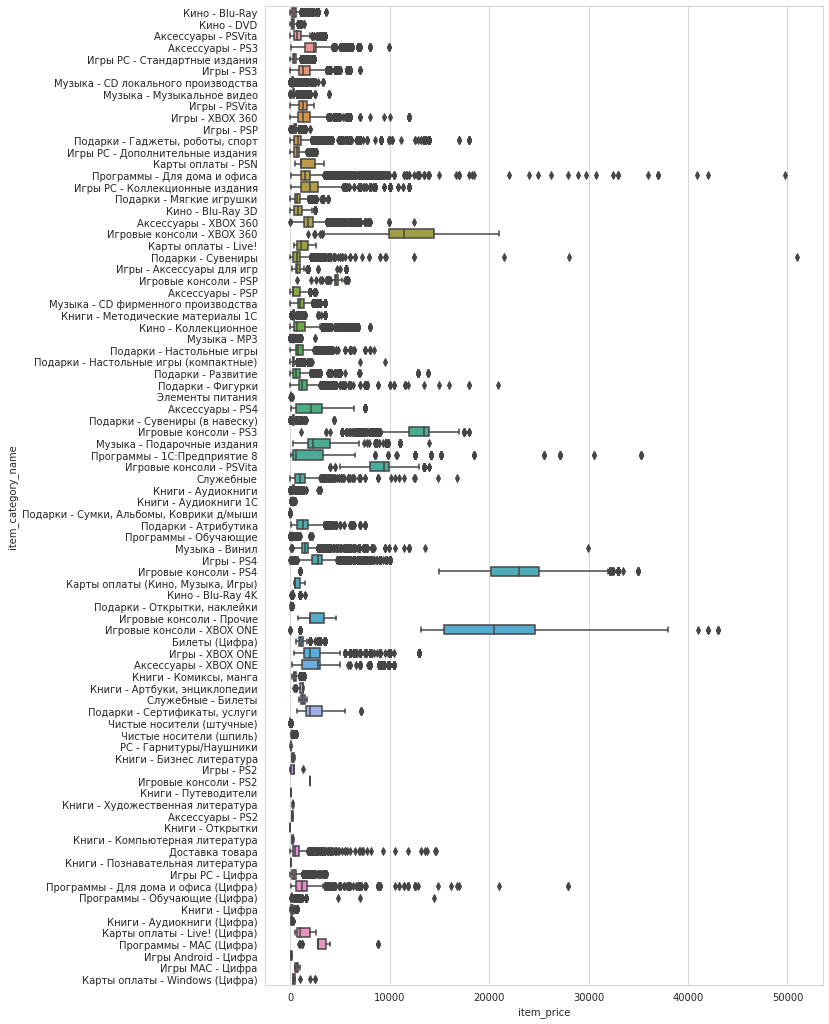

In [50]:
plt.subplots(figsize=(10, 18))
sns.boxplot(x='item_price', y='item_category_name', data=train_df);

### Price vs Shop

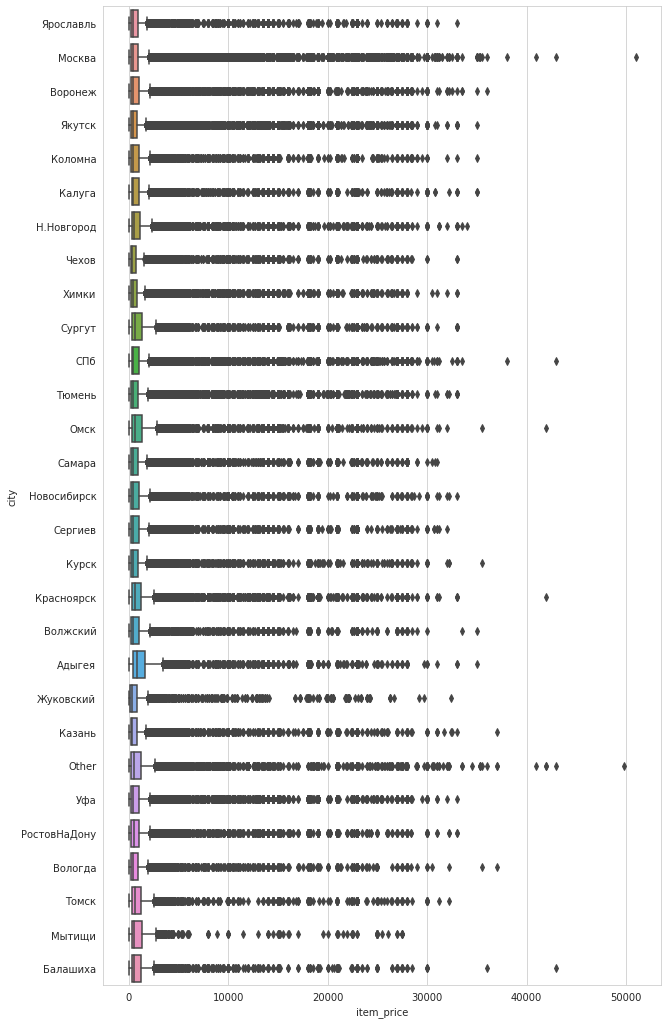

In [51]:
plt.subplots(figsize=(10, 18))
sns.boxplot(x='item_price', y='city', data=train_df);

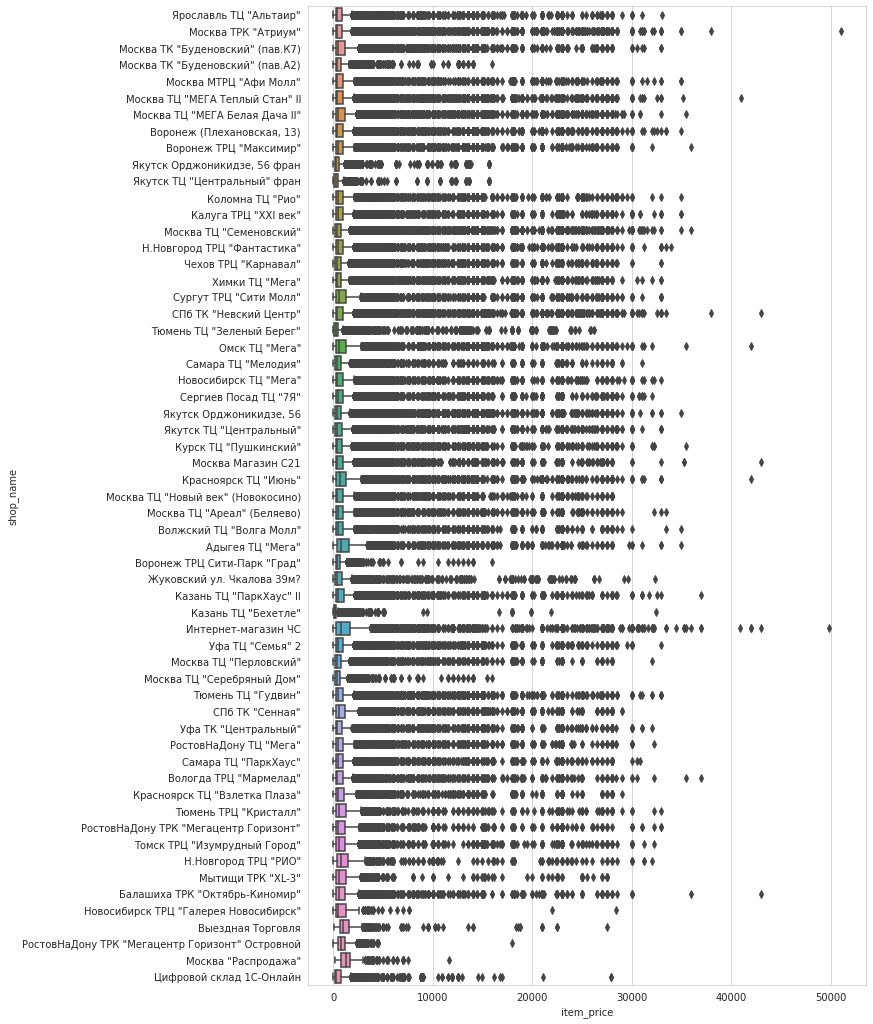

In [52]:
plt.subplots(figsize=(10, 18))
sns.boxplot(x='item_price', y='shop_name', data=train_df);

Price distribution doesn't differ much from shop to shop

### Number of sales vs Shop

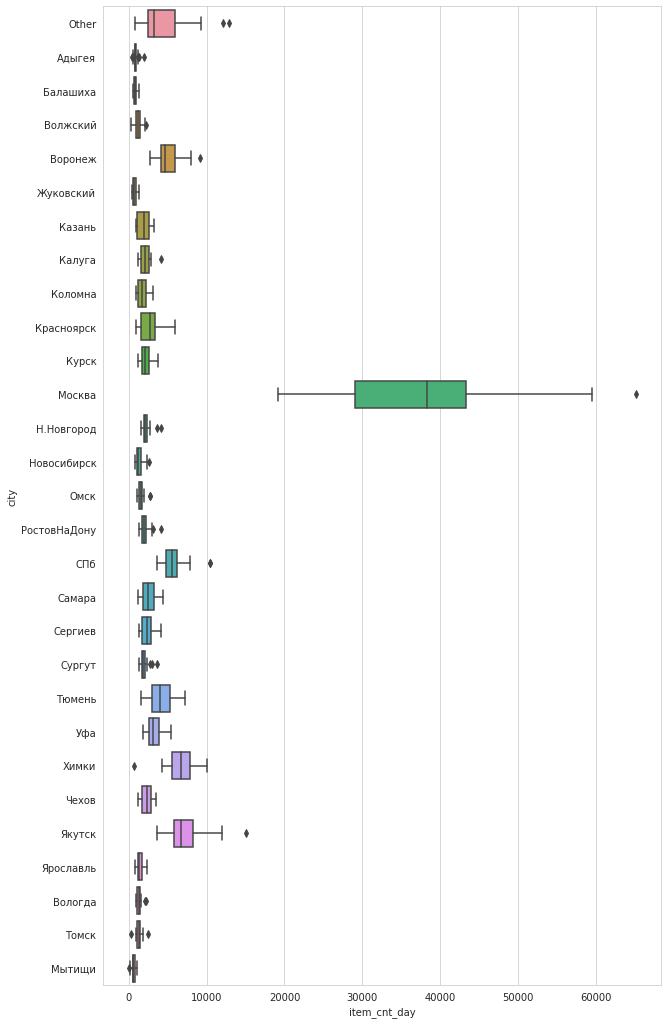

In [53]:
plt.subplots(figsize=(10, 18))
sns.boxplot(x='item_cnt_day', y='city', data=train_df.groupby(['month', 'city'])['item_cnt_day'].sum().reset_index());

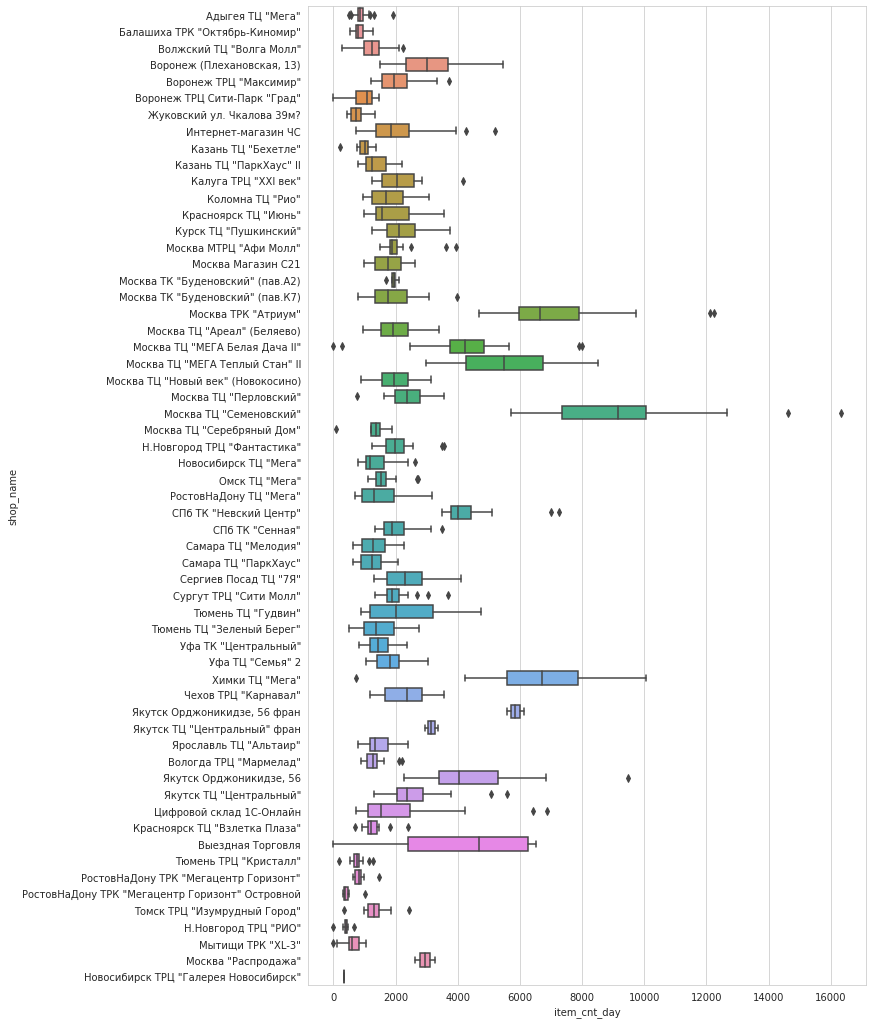

In [54]:
plt.subplots(figsize=(10, 18))
sns.boxplot(x='item_cnt_day', y='shop_name', data=train_df.groupby(['month', 'shop_name'])['item_cnt_day'].sum().reset_index());

### Number of sales (monthly sum) vs Category

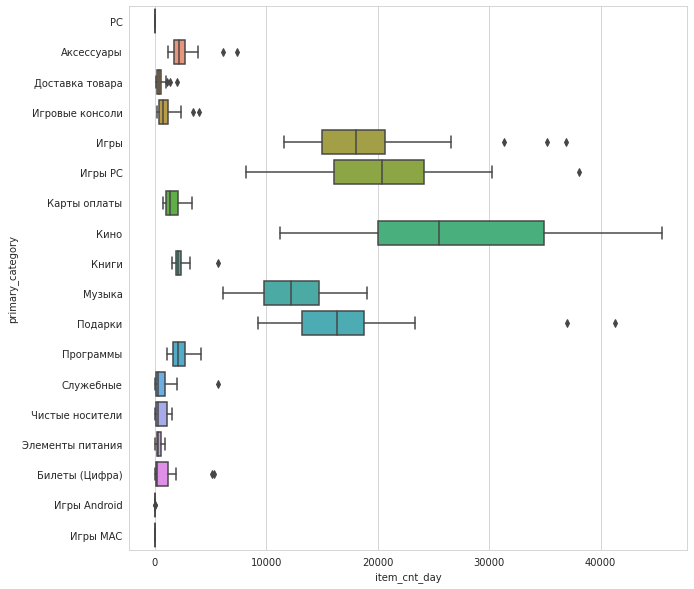

In [55]:
plt.subplots(figsize=(10, 10))
sns.boxplot(x='item_cnt_day', y='primary_category', data=train_df.groupby(['month', 'primary_category'])['item_cnt_day'].sum().reset_index());

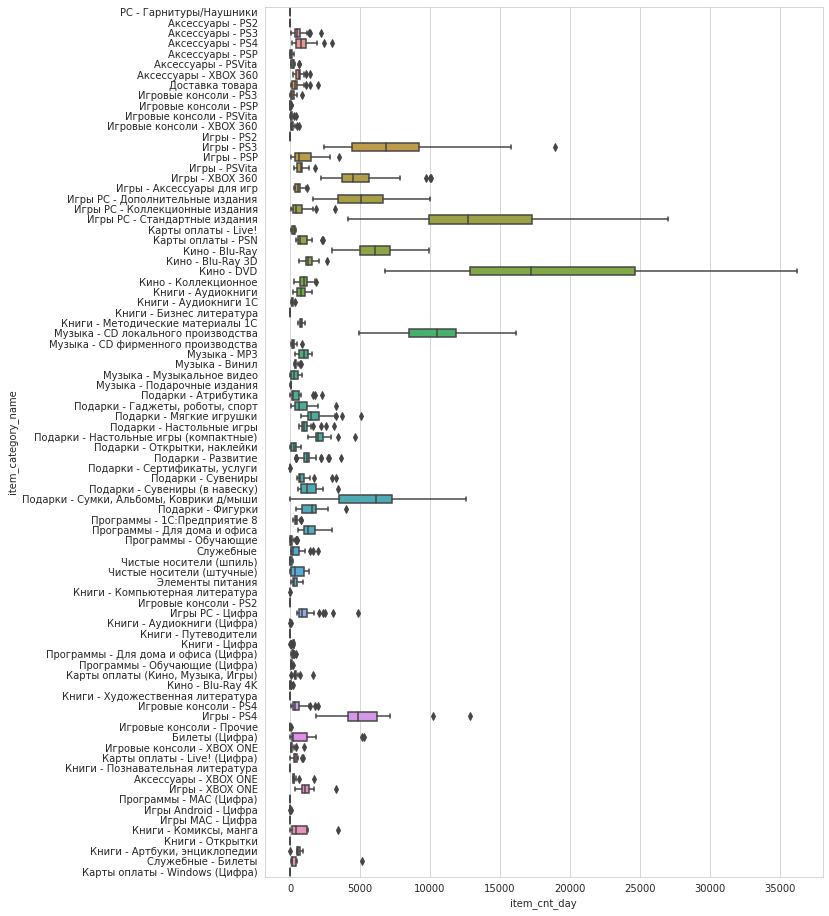

In [56]:
plt.subplots(figsize=(10, 16))
sns.boxplot(x='item_cnt_day', y='item_category_name', data=train_df.groupby(['month', 'item_category_name'])['item_cnt_day'].sum().reset_index());

### Distribution of sales for shop-item pairs 

in the last month of training data (October 2015)

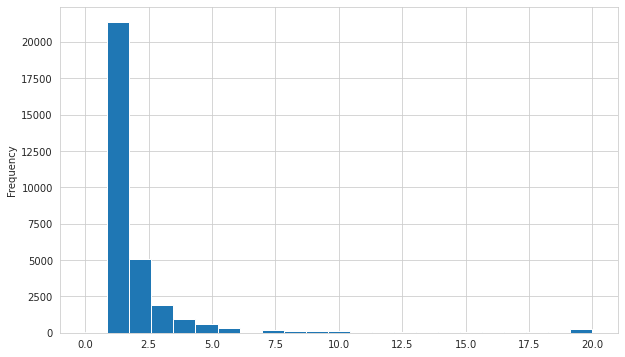

In [57]:
oct15 = (train_df[train_df.date >= '2015-10-01']
                 .groupby(['shop_id', 'item_id'])
                 .agg({'item_cnt_day': 'sum'})
                 .rename(columns={'item_cnt_day': 'item_cnt_month'})
                 .reset_index()
                 )

# Make a "naive prediction"
# pred = test_df.merge(oct15, how='left', on=['shop_id', 'item_id'])
# pred['item_cnt_month'] = pred['item_cnt_month'].fillna(0).clip(0, 20)
# pred.to_csv('naive.csv', index=False, columns=['ID', 'item_cnt_month'])  # 1.16777 Public LB

oct15['item_cnt_month'].clip(0, 20).plot.hist(bins=23);

Distribution of average monthly sales for shop-item pairs (not very informative, as we saw previously, distribution changes over the time)

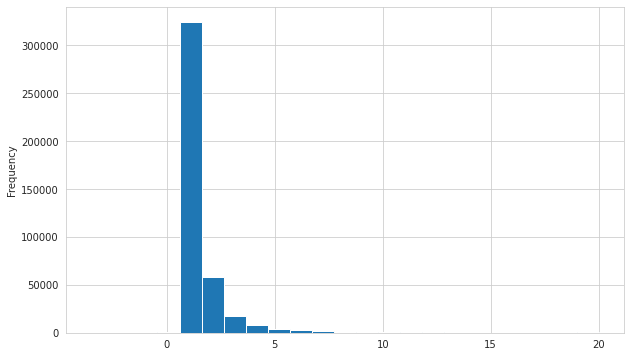

In [58]:
monthly_shop_mean = train_df.groupby(['date_block_num', 'item_name', 'shop_name'])['item_cnt_day'].sum().groupby(['item_name', 'shop_name']).mean()
top_sales = monthly_shop_mean > 20
monthly_shop_mean[top_sales] = 20

# pred = test_df.merge(monthly_shop_mean, how='left', on=['shop_name', 'item_name'])
# pred['item_cnt_month'] = pred['item_cnt_day'].fillna(0).clip(0, 20)
# pred.to_csv('monthly_shop_mean.csv', index=False, columns=['ID', 'item_cnt_month'])  # 1.79137 on Public LB

monthly_shop_mean.plot.hist(bins=23);

In [59]:
monthly_shop_mean[top_sales]

item_name                                             shop_name                      
007: КООРДИНАТЫ «СКАЙФОЛЛ»                            Якутск Орджоникидзе, 56 фран       20.0
1812: УЛАНСКАЯ БАЛЛАДА                                Москва ТЦ "МЕГА Теплый Стан" II    20.0
1С:Бухгалтерия 8. Учебная версия. Издание 7.          Москва Магазин С21                 20.0
1С:Бухгалтерия 8. Учебная версия. Издание 8.          Москва Магазин С21                 20.0
1С:Деньги 8 Электронная версия [PC, Цифровая версия]  Цифровой склад 1С-Онлайн           20.0
                                                                                         ... 
Энциклопедия Мир Ведьмака                             Выездная Торговля                  20.0
                                                      Интернет-магазин ЧС                20.0
                                                      Москва "Распродажа"                20.0
                                                      Москва ТРК "Ат

Distribution of exponential weighted average monthly sales for shop-item pairs. For alpha=0.9 we can think about EWA as a naive prediction with a little past impact. In fact, it gives the best result on public LB. Parameter alpha can be tuned to create a better baseline, or get an intuition about how much past impacts the future.

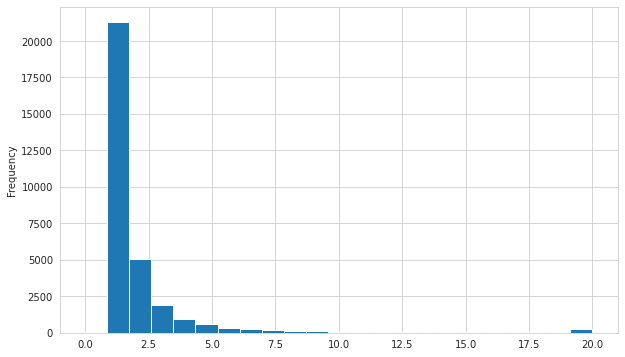

In [60]:
monthly_shop_ewmean = train_df.groupby(['date_block_num', 'item_name', 'shop_name'])['item_cnt_day'].sum()
monthly_shop_ewmean = monthly_shop_ewmean.unstack(level=0).T.sort_index()
mask = ~monthly_shop_ewmean.iloc[-1].isna()
monthly_shop_ewmean = monthly_shop_ewmean.fillna(0).ewm(alpha=0.9, adjust=False).mean().iloc[-1]
monthly_shop_ewmean = monthly_shop_ewmean[mask]
monthly_shop_ewmean.name = 'item_cnt_month'

# pred = test_df.merge(monthly_shop_ewmean, how='left', on=['shop_name', 'item_name'])
# pred['item_cnt_month'] = pred['item_cnt_month'].fillna(0).clip(0, 20)
# pred.to_csv('monthly_shop_ewmean.csv', index=False, columns=['ID', 'item_cnt_month'])  # 1.14567

monthly_shop_ewmean.clip(0, 20).plot.hist(bins=23);

## Test data exploration

In [61]:
test_df

ID  shop_id  item_id                              shop_name  \
0            0        5     5037                 Вологда ТРЦ "Мармелад"   
1         5100        4     5037               Волжский ТЦ "Волга Молл"   
2        10200        6     5037             Воронеж (Плехановская, 13)   
3        15300        3     5037         Балашиха ТРК "Октябрь-Киномир"   
4        20400        2     5037                       Адыгея ТЦ "Мега"   
...        ...      ...      ...                                    ...   
214195  193262       46      168                  Сергиев Посад ТЦ "7Я"   
214196  198362       41      168                 РостовНаДону ТЦ "Мега"   
214197  203462       44      168                    Самара ТЦ "Мелодия"   
214198  208562       39      168  РостовНаДону ТРК "Мегацентр Горизонт"   
214199  213662       45      168                   Самара ТЦ "ПаркХаус"   

                city                                          item_name  \
0            Вологда                     NHL 15 [PS3, русские субтитры]   
1           Волжский                     NHL 15 [PS3, русские субтитры]   
2            Воронеж                     NHL 15 [PS3, русские субтитры]   
3           Балашиха                     NHL 15 [PS3, русские субтитры]   
4             Адыгея                     NHL 15 [PS3, русские субтитры]   
...              ...                                                ...   
214195       Сергиев  1С:Аудиокниги. Аудиокурсы по географии. 6 клас...   
214196  РостовНаДону  1С:Аудиокниги. Аудиокурсы по географии. 6 клас...   
214197        Самара  1С:Аудиокниги. Аудиокурсы по географии. 6 клас...   
214198  РостовНаДону  1С:Аудиокниги. Аудиокурсы по географии. 6 клас...   
214199        Самара  1С:Аудиокниги. Аудиокурсы по географии. 6 клас...   

        item_category_id          item_category_name primary_category  
0                     19                  Игры - PS3             Игры  
1                     19                  Игры - PS3             Игры  
2                     19                  Игры - PS3             Игры  
3                     19                  Игры - PS3             Игры  
4                     19                  Игры - PS3             Игры  
...                  ...                         ...              ...  
214195                44  Книги - Аудиокниги (Цифра)            Книги  
214196                44  Книги - Аудиокниги (Цифра)            Книги  
214197                44  Книги - Аудиокниги (Цифра)            Книги  
214198                44  Книги - Аудиокниги (Цифра)            Книги  
214199                44  Книги - Аудиокниги (Цифра)            Книги  

[214200 rows x 9 columns]

In [62]:
test_df['item+shop'] = test_df['item_id'].astype('str') + '_' + test_df['shop_id'].astype('str')
train_df['item+shop'] = train_df['item_id'].astype('str') + '_' + train_df['shop_id'].astype('str')

test_only = {col: len(set(np.unique(test_df[col])) - set(np.unique(train_df[col]))) for col in test_df.columns[1:]}

uniques = pd.DataFrame({'test': test_df.nunique(), 'train': train_df.nunique(), 'test_only': test_only}).dropna()
uniques['common'] = uniques['test'] - uniques['test_only']
uniques['train_only'] = uniques['train'] - uniques['common']
uniques

test     train  test_only    common  train_only
city                    27.0      29.0        0.0      27.0         2.0
item+shop           214200.0  423804.0   102764.0  111436.0    312368.0
item_category_id        62.0      84.0        0.0      62.0        22.0
item_category_name      62.0      84.0        0.0      62.0        22.0
item_id               5100.0   21806.0      363.0    4737.0     17069.0
item_name             5100.0   21806.0      363.0    4737.0     17069.0
primary_category        16.0      18.0        0.0      16.0         2.0
shop_id                 42.0      59.0        0.0      42.0        17.0
shop_name               42.0      59.0        0.0      42.0        17.0

Almost a half of shop-item pairs from the test data do not appear in the train dataset.
Also, there are 363 totally new items to predicts

### Intuition about the validation scheme

In [63]:
# test shops * test items
42 * 5100

214200

Bingo! We are predicting some set of items in all the shops. This is a key observation for the validation scheme construction

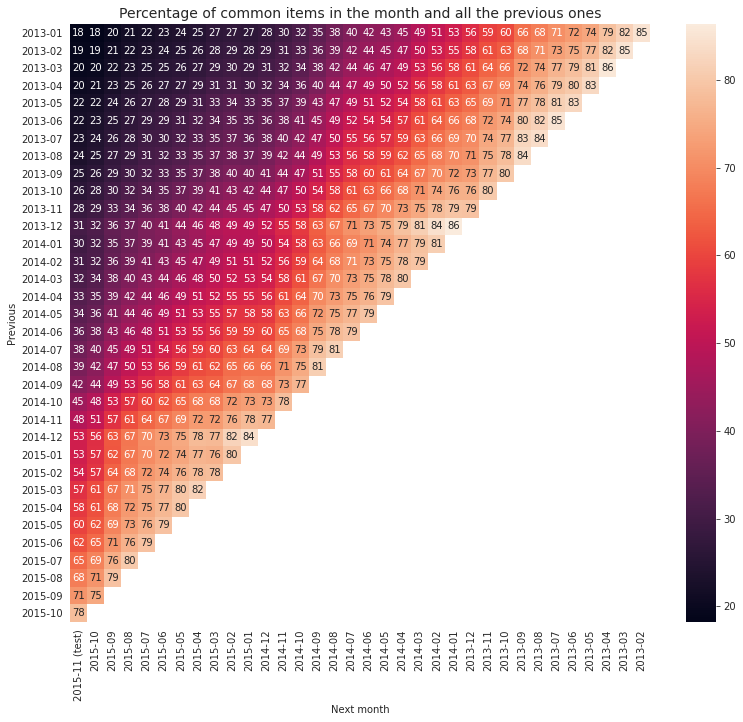

In [64]:
unique_items = train_df.groupby('month')['item_id'].agg(set)
unique_items['2015-11 (test)'] = set(test_df.item_id)

prev_ratio = pd.DataFrame()
for i in range(unique_items.size-1, 0, -1):
    new_ = unique_items.iloc[i]
    old_ = unique_items.iloc[:i]
    prev_ratio[unique_items.index[i]] = 1 - (new_ - old_).apply(len) / len(new_)
    
plt.subplots(figsize=(13, 11))
sns.heatmap(prev_ratio*100, annot=True, fmt='.0f', mask=prev_ratio.isna())
plt.title('Percentage of common items in the month and all the previous ones', fontsize=14)
plt.ylabel("Previous")
plt.xlabel("Next month");

The distributions for different months look similar, which means for any month we will consider as a validation set we can predict all the items presented in this month. (Remember that as we see in  <a href="#Unique-items-vs-Time" data-toc-modified-id="Unique-items-vs-Time-4.1">Unique items vs Time</a> we also have similar number of new items per month)

In [65]:
import itertools
monthly_sets = train_df.groupby('month')[['shop_id', 'item_id']].agg(set).reset_index()
lists = monthly_sets.apply(lambda x: itertools.product([x.month], x.shop_id, x.item_id), axis=1).to_list()
new_val_pairs = pd.DataFrame(itertools.chain(*lists), columns=['month', 'shop_id', 'item_id'])
test_df['month'] = '2015-11 (test)'
new_val_pairs = new_val_pairs.sort_values('month').append(test_df[['month', 'shop_id', 'item_id']])
new_val_pairs['item+shop'] = new_val_pairs['item_id'].astype('str') + '_' + new_val_pairs['shop_id'].astype('str')

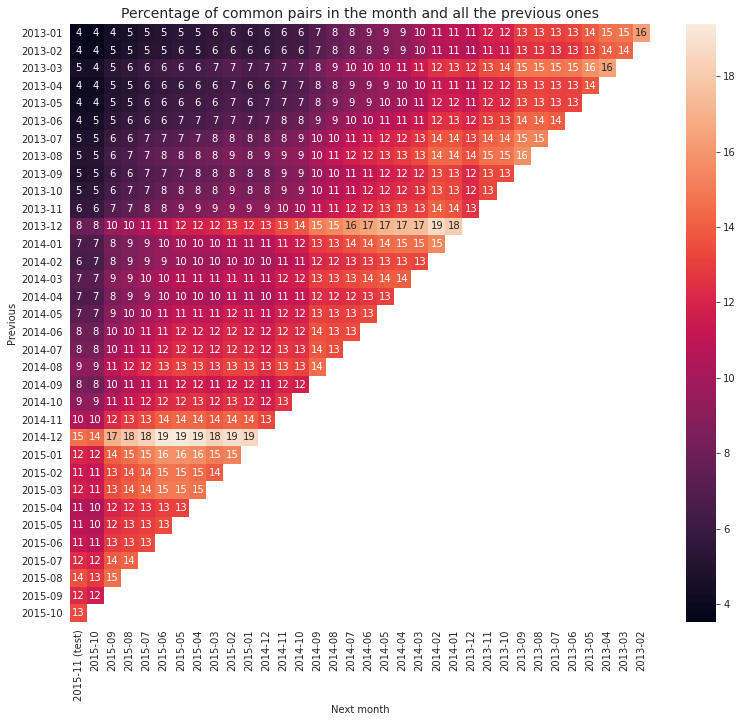

In [66]:
validation_folds = new_val_pairs.groupby('month')['item+shop'].agg(set)
train_folds = train_df.groupby('month')['item+shop'].agg(set)

prev_ratio = pd.DataFrame()
for i in range(validation_folds.size-1, 0, -1):
    new_ = validation_folds.iloc[i]
    old_ = train_folds.iloc[:i]
    prev_ratio[validation_folds.index[i]] = 1 - (new_ - old_).apply(len) / len(new_)
    
plt.subplots(figsize=(13, 11))
sns.heatmap(prev_ratio*100, annot=True, fmt='.0f', mask=prev_ratio.isna())
plt.title('Percentage of common pairs in the month and all the previous ones', fontsize=14)
plt.ylabel("Previous")
plt.xlabel("Next month");

The distribution of common pairs percentage looks similar, so probably it will be a good idea for building a validation scheme. The only visible outlier is in Decembers, perhaps because of the bigger number of unique items in these months.

In [67]:
# save for the future usage
train_new_val_pairs = new_val_pairs[new_val_pairs.month != '2015-11 (test)']
train_new_val_pairs['date_block_num'] = train_new_val_pairs.month.factorize()[0]
train_new_val_pairs.to_csv('validation.csv', columns=['date_block_num', 'shop_id', 'item_id'], index=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
common = test_df.merge(train_df, on=['shop_id', 'item_id'])[['shop_id', 'item_id']].drop_duplicates()
common['item+shop'] = common['item_id'].astype('str') + '_' + common['shop_id'].astype('str')
test_only = test_df[~test_df['item+shop'].isin(common['item+shop'])]
new_items = test_df[~test_df['item_id'].isin(train_df['item_id'])]

### New items categories

In [69]:
new_items.nunique()

ID                    15246
shop_id                  42
item_id                 363
shop_name                42
city                     27
item_name               363
item_category_id         39
item_category_name       39
primary_category         12
item+shop             15246
month                     1
dtype: int64

In [70]:
363*42

15246

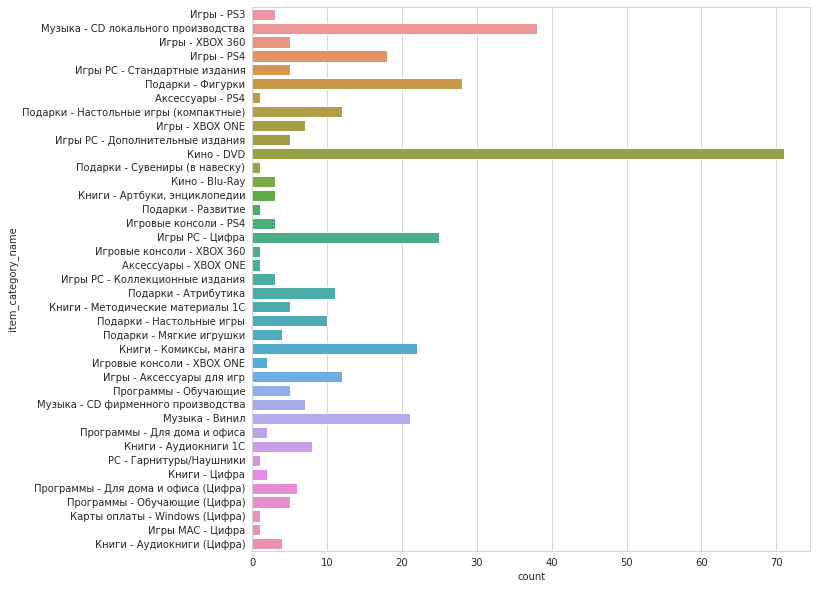

In [71]:
plt.subplots(figsize=(10, 10))
sns.countplot(y='item_category_name', data=new_items[['item_id', 'item_category_name']].drop_duplicates());

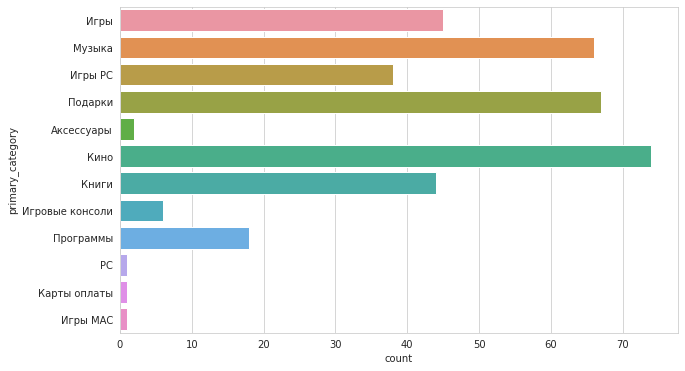

In [72]:
sns.countplot(y='primary_category', data=new_items[['item_id', 'primary_category']].drop_duplicates());

### Train-only categories and shops

In [73]:
set(np.unique(train_df.primary_category)) - set(np.unique(test_df.primary_category))

{'Билеты (Цифра)', 'Чистые носители'}

In [74]:
missing_cat = set(np.unique(train_df.item_category_name)) - set(np.unique(test_df.item_category_name))
missing_cat

{'Аксессуары - PS2',
 'Аксессуары - PSP',
 'Билеты (Цифра)',
 'Игровые консоли - PS2',
 'Игровые консоли - PSP',
 'Игровые консоли - PSVita',
 'Игровые консоли - Прочие',
 'Игры - PS2',
 'Карты оплаты (Кино, Музыка, Игры)',
 'Кино - Blu-Ray 4K',
 'Книги - Бизнес литература',
 'Книги - Компьютерная литература',
 'Книги - Открытки',
 'Книги - Познавательная литература',
 'Книги - Путеводители',
 'Книги - Художественная литература',
 'Музыка - Музыкальное видео',
 'Подарки - Открытки, наклейки',
 'Подарки - Сертификаты, услуги',
 'Служебные - Билеты',
 'Чистые носители (шпиль)',
 'Чистые носители (штучные)'}

In [75]:
missing_shops = set(np.unique(train_df.shop_name)) - set(np.unique(test_df.shop_name))
missing_shops

{'Воронеж ТРЦ Сити-Парк "Град"',
 'Выездная Торговля',
 'Казань ТЦ "Бехетле"',
 'Красноярск ТЦ "Взлетка Плаза"',
 'Москва "Распродажа"',
 'Москва ТК "Буденовский" (пав.А2)',
 'Москва ТЦ "МЕГА Белая Дача II"',
 'Москва ТЦ "Новый век" (Новокосино)',
 'Москва ТЦ "Перловский"',
 'Москва ТЦ "Серебряный Дом"',
 'Мытищи ТРК "XL-3"',
 'РостовНаДону ТРК "Мегацентр Горизонт" Островной',
 'СПб ТК "Сенная"',
 'Тюмень ТЦ "Зеленый Берег"',
 'Химки ТЦ "Мега"',
 'Якутск Орджоникидзе, 56 фран',
 'Якутск ТЦ "Центральный" фран'}

We've seen these train-only categories on the plots earlier.